# Classification model selection - 

`Logistic Regression`, 
`Support Vector Classifier`, 
`Kneighbors Classifier`, 
`Decision Tree Classifier`,
`Randomforestclassifier` and 
`XGBoost Classifier models`

In [89]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as plt
import plotly.express as px
px.defaults.template = 'plotly_dark'

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,roc_auc_score
import warnings
warnings.filterwarnings("ignore")


In [29]:
# lets us see all of the columns
pd.set_option('display.max_columns', None)

In [31]:
df = pd.read_csv('model_test.csv')
df.head()

,VendorID,passenger_count,RatecodeID,PULocationID,DOLocationID,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,2,6,1,100,231,1,saturday,1,0,0,0,mar
1,1,1,1,186,43,1,tuesday,0,1,0,0,apr
2,1,1,1,262,236,0,friday,1,0,0,0,dec
3,2,1,1,188,97,1,sunday,0,1,0,0,may
4,2,6,1,161,236,1,saturday,0,0,0,1,mar


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15265 entries, 0 to 15264
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VendorID         15265 non-null  int64 
 1   passenger_count  15265 non-null  int64 
 2   RatecodeID       15265 non-null  int64 
 3   PULocationID     15265 non-null  int64 
 4   DOLocationID     15265 non-null  int64 
 5   generous         15265 non-null  int64 
 6   day              15265 non-null  object
 7   am_rush          15265 non-null  int64 
 8   daytime          15265 non-null  int64 
 9   pm_rush          15265 non-null  int64 
 10  nighttime        15265 non-null  int64 
 11  month            15265 non-null  object
dtypes: int64(10), object(2)
memory usage: 1.4+ MB


In [35]:
# 1. Define list of cols to convert to string
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID']

# 2. Convert each column to string
for col in cols_to_str:
    df[col] = df[col].astype('str')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15265 entries, 0 to 15264
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VendorID         15265 non-null  object
 1   passenger_count  15265 non-null  int64 
 2   RatecodeID       15265 non-null  object
 3   PULocationID     15265 non-null  object
 4   DOLocationID     15265 non-null  object
 5   generous         15265 non-null  int64 
 6   day              15265 non-null  object
 7   am_rush          15265 non-null  int64 
 8   daytime          15265 non-null  int64 
 9   pm_rush          15265 non-null  int64 
 10  nighttime        15265 non-null  int64 
 11  month            15265 non-null  object
dtypes: int64(6), object(6)
memory usage: 1.4+ MB


In [37]:
# Selecting numerical columns
num_columns = df.select_dtypes(include=['int64'])

# Selecting categorical columns
cat_columns = df.select_dtypes(include=['object'])

print("num_columns:")
print(num_columns.columns)

print("\nCat_Columns:")
print(cat_columns.columns)


num_columns:
Index(['passenger_count', 'generous', 'am_rush', 'daytime', 'pm_rush',
       'nighttime'],
      dtype='object')

Cat_Columns:
Index(['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'day',
       'month'],
      dtype='object')


In [39]:
df.head()

,VendorID,passenger_count,RatecodeID,PULocationID,DOLocationID,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,2,6,1,100,231,1,saturday,1,0,0,0,mar
1,1,1,1,186,43,1,tuesday,0,1,0,0,apr
2,1,1,1,262,236,0,friday,1,0,0,0,dec
3,2,1,1,188,97,1,sunday,0,1,0,0,may
4,2,6,1,161,236,1,saturday,0,0,0,1,mar


In [41]:
df1 = df.copy()
df1 = pd.get_dummies(df1,drop_first=True).astype(int)

In [43]:
X = df1.drop(columns = 'generous')

In [45]:
X.head()

,passenger_count,am_rush,daytime,pm_rush,nighttime,VendorID_2,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_99,PULocationID_10,PULocationID_100,PULocationID_106,PULocationID_107,PULocationID_112,PULocationID_113,PULocationID_114,PULocationID_116,PULocationID_12,PULocationID_123,PULocationID_125,PULocationID_127,PULocationID_128,PULocationID_129,PULocationID_13,PULocationID_130,PULocationID_131,PULocationID_132,PULocationID_133,PULocationID_134,PULocationID_135,PULocationID_137,PULocationID_138,PULocationID_140,PULocationID_141,PULocationID_142,PULocationID_143,PULocationID_144,PULocationID_145,PULocationID_146,PULocationID_148,PULocationID_151,PULocationID_152,PULocationID_153,PULocationID_158,PULocationID_161,PULocationID_162,PULocationID_163,PULocationID_164,PULocationID_166,PULocationID_17,PULocationID_170,PULocationID_173,PULocationID_179,PULocationID_181,PULocationID_186,PULocationID_188,PULocationID_189,PULocationID_190,PULocationID_193,PULocationID_196,PULocationID_208,PULocationID_209,PULocationID_211,PULocationID_213,PULocationID_216,PULocationID_218,PULocationID_223,PULocationID_224,PULocationID_225,PULocationID_226,PULocationID_229,PULocationID_230,PULocationID_231,PULocationID_232,PULocationID_233,PULocationID_234,PULocationID_236,PULocationID_237,PULocationID_238,PULocationID_239,PULocationID_24,PULocationID_243,PULocationID_244,PULocationID_246,PULocationID_247,PULocationID_249,PULocationID_25,PULocationID_255,PULocationID_256,PULocationID_258,PULocationID_260,PULocationID_261,PULocationID_262,PULocationID_263,PULocationID_264,PULocationID_265,PULocationID_28,PULocationID_33,PULocationID_35,PULocationID_36,PULocationID_37,PULocationID_4,PULocationID_40,PULocationID_41,PULocationID_42,PULocationID_43,PULocationID_45,PULocationID_48,PULocationID_49,PULocationID_50,PULocationID_52,PULocationID_57,PULocationID_61,PULocationID_62,PULocationID_65,PULocationID_66,PULocationID_68,PULocationID_7,PULocationID_70,PULocationID_74,PULocationID_75,PULocationID_79,PULocationID_80,PULocationID_82,PULocationID_87,PULocationID_88,PULocationID_90,PULocationID_91,PULocationID_92,PULocationID_93,PULocationID_95,PULocationID_97,DOLocationID_10,DOLocationID_100,DOLocationID_102,DOLocationID_106,DOLocationID_107,DOLocationID_11,DOLocationID_112,DOLocationID_113,DOLocationID_114,DOLocationID_116,DOLocationID_117,DOLocationID_118,DOLocationID_119,DOLocationID_12,DOLocationID_120,DOLocationID_121,DOLocationID_123,DOLocationID_124,DOLocationID_125,DOLocationID_126,DOLocationID_127,DOLocationID_129,DOLocationID_13,DOLocationID_130,DOLocationID_131,DOLocationID_132,DOLocationID_133,DOLocationID_134,DOLocationID_135,DOLocationID_136,DOLocationID_137,DOLocationID_138,DOLocationID_14,DOLocationID_140,DOLocationID_141,DOLocationID_142,DOLocationID_143,DOLocationID_144,DOLocationID_145,DOLocationID_146,DOLocationID_147,DOLocationID_148,DOLocationID_15,DOLocationID_151,DOLocationID_152,DOLocationID_153,DOLocationID_157,DOLocationID_158,DOLocationID_159,DOLocationID_16,DOLocationID_160,DOLocationID_161,DOLocationID_162,DOLocationID_163,DOLocationID_164,DOLocationID_166,DOLocationID_168,DOLocationID_169,DOLocationID_17,DOLocationID_170,DOLocationID_173,DOLocationID_174,DOLocationID_175,DOLocationID_177,DOLocationID_178,DOLocationID_179,DOLocationID_180,DOLocationID_181,DOLocationID_182,DOLocationID_183,DOLocationID_186,DOLocationID_188,DOLocationID_189,DOLocationID_19,DOLocationID_192,DOLocationID_193,DOLocationID_194,DOLocationID_195,DOLocationID_196,DOLocationID_197,DOLocationID_198,DOLocationID_200,DOLocationID_202,DOLocationID_208,DOLocationID_209,DOLocationID_21,DOLocationID_210,DOLocationID_211,DOLocationID_212,DOLocationID_213,DOLocationID_216,DOLocationID_217,DOLocationID_218,DOLocationID_22,DOLocationID_220,DOLocationID_223,DOLocationID_224,DOLocationID_225,DOLocationID_226,DOLocationID_228,DOLocationID_229,DOLocationID_23,DOLocationID_230,DOLocationID_231,DOLocationID_232,DOLocationID_233,DOLocationID_234,DOLocationID_235,D

In [47]:
y = df1['generous']

In [49]:
scaler = StandardScaler()

In [51]:
X = scaler.fit_transform(X)

In [53]:
x_scaled = scaler.transform(X)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print('X_train : Shape - ',X_train.shape)
print('X_test  : Shape - ',X_test.shape)
print('y_train : Shape - ',y_train.shape)
print('y_test  : Shape - ',y_test.shape)

X_train : Shape -  (12212, 343)
X_test  : Shape -  (3053, 343)
y_train : Shape -  (12212,)
y_test  : Shape -  (3053,)


## 1. LogisticRegression()

In [55]:
log = LogisticRegression()

In [56]:
log.fit(X_train,y_train)

LogisticRegression()

In [57]:
y_pred_log = log.predict(X_test)

In [82]:
accuracy_log = round(accuracy_score(y_test, y_pred_log) * 100, 2)
precision_log = round(precision_score(y_test, y_pred_log) * 100, 2)
recall_log = round(recall_score(y_test, y_pred_log) * 100, 2)
f1_log = round(f1_score(y_test, y_pred_log) * 100, 2)
roc_auc_log = round(roc_auc_score(y_test, y_pred_log) * 100, 2)

# Create a DataFrame to store the evaluation metrics for logistic regression
metrics_log = pd.DataFrame({'Model': ['Logistic Regression'],
                            'Accuracy Score': [accuracy_log],
                            'Precision Score': [precision_log],
                            'Recall Score': [recall_log],
                            'F1 Score': [f1_log],
                            'ROC-AUC Score': [roc_auc_log]
                           })

# Display the DataFrame
metrics_log

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score,ROC-AUC Score
0,Logistic Regression,69.9,69.46,76.42,72.77,69.54


# 2. Support Vector Classifier

In [59]:
svm = svm.SVC()

In [60]:
svm.fit(X_train,y_train)

SVC()

In [61]:
y_pred_svc = svm.predict(X_test)

In [62]:
accuracy_svc = round(accuracy_score(y_test, y_pred_svc) * 100, 2)
precision_svc = round(precision_score(y_test, y_pred_svc) * 100, 2)
recall_svc = round(recall_score(y_test, y_pred_svc) * 100, 2)
f1_svc = round(f1_score(y_test, y_pred_svc) * 100, 2)
roc_auc_svc = round(roc_auc_score(y_test, y_pred_svc) * 100, 2)

metrics_svc = pd.DataFrame({'Model': ['Support Vector Classifier'],
                            'Accuracy Score': [accuracy_svc],
                            'Precision Score': [precision_svc],
                            'Recall Score': [recall_svc],
                            'F1 Score': [f1_svc],
                            'ROC-AUC Score': [roc_auc_svc]
                           })


metrics_svc

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score,ROC-AUC Score
0,Support Vector Classifier,69.11,68.32,77.04,72.42,68.67


# 3. Kneighbors Classifier

In [63]:
knn = KNeighborsClassifier(n_neighbors=19)

In [64]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [65]:
y_pred_knn = knn.predict(X_test)

In [66]:
accuracy_knn = round(accuracy_score(y_test, y_pred_knn) * 100, 2)
precision_knn = round(precision_score(y_test, y_pred_knn) * 100, 2)
recall_knn = round(recall_score(y_test, y_pred_knn) * 100, 2)
f1_knn = round(f1_score(y_test, y_pred_knn) * 100, 2)
roc_auc_knn = round(roc_auc_score(y_test, y_pred_knn) * 100, 2)

metrics_knn = pd.DataFrame({'Model': ['K-Nearest Neighbors'],
                            'Accuracy Score': [accuracy_knn],
                            'Precision Score': [precision_knn],
                            'Recall Score': [recall_knn],
                            'F1 Score': [f1_knn],
                            'ROC-AUC Score': [roc_auc_knn]
                           })


metrics_knn

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score,ROC-AUC Score
0,K-Nearest Neighbors,55.78,57.14,63.97,60.36,55.33


### To Find Best accuracy score for an n_neighbors,k Value

In [67]:
best_accuracy = 0
best_k = None
score = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    score.append(accuracy)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("Best value of k:", best_k)
print("Best accuracy score:", best_accuracy)
  

Best value of k: 19
Best accuracy score: 0.5578119882083197


# 4. Decision Tree Classifier


In [68]:
dt = DecisionTreeClassifier()

In [69]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [70]:
y_pred_dt = dt.predict(X_test)

In [71]:
accuracy_dt = round(accuracy_score(y_test, y_pred_dt) * 100, 2)
precision_dt = round(precision_score(y_test, y_pred_dt) * 100, 2)
recall_dt = round(recall_score(y_test, y_pred_dt) * 100, 2)
f1_dt = round(f1_score(y_test, y_pred_dt) * 100, 2)
roc_auc_dt = round(roc_auc_score(y_test, y_pred_dt) * 100, 2)

# Append the metrics to the existing DataFrame
metrics_dt = pd.DataFrame({'Model': ['Decision Tree'],
                           'Accuracy Score': [accuracy_dt],
                           'Precision Score': [precision_dt],
                           'Recall Score': [recall_dt],
                           'F1 Score': [f1_dt],
                           'ROC-AUC Score': [roc_auc_dt]
                          })
metrics_dt

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score,ROC-AUC Score
0,Decision Tree,59.94,61.48,63.97,62.7,59.72


# 5. Randomforestclassifier


In [72]:
rf = RandomForestClassifier()

In [73]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [74]:
y_pred_rf = rf.predict(X_test)

In [75]:
accuracy_rf = round(accuracy_score(y_test, y_pred_rf) * 100, 2)
precision_rf = round(precision_score(y_test, y_pred_rf) * 100, 2)
recall_rf = round(recall_score(y_test, y_pred_rf) * 100, 2)
f1_rf = round(f1_score(y_test, y_pred_rf) * 100, 2)
roc_auc_rf = round(roc_auc_score(y_test, y_pred_rf) * 100, 2)

# Append the metrics to the existing DataFrame
metrics_rf = pd.DataFrame({'Model': ['Random Forest'],
                           'Accuracy Score': [accuracy_rf],
                           'Precision Score': [precision_rf],
                           'Recall Score': [recall_rf],
                           'F1 Score': [f1_rf],
                           'ROC-AUC Score': [roc_auc_rf]
                          })
metrics_rf

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score,ROC-AUC Score
0,Random Forest,68.39,67.83,75.98,71.68,67.97


# 6. XGBClassifier

In [76]:
xgb = XGBClassifier()

In [77]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [78]:
y_pred_xgb = xgb.predict(X_test)

In [79]:
accuracy_xgb = round(accuracy_score(y_test, y_pred_xgb) * 100, 2)
precision_xgb = round(precision_score(y_test, y_pred_xgb) * 100, 2)
recall_xgb = round(recall_score(y_test, y_pred_xgb) * 100, 2)
f1_xgb = round(f1_score(y_test, y_pred_xgb) * 100, 2)
roc_auc_xgb = round(roc_auc_score(y_test, y_pred_xgb) * 100, 2)

# Append the metrics to the existing DataFrame
metrics_xgb = pd.DataFrame({'Model': ['XGBoost Classifier'],
                             'Accuracy Score': [accuracy_xgb],
                             'Precision Score': [precision_xgb],
                             'Recall Score': [recall_xgb],
                             'F1 Score': [f1_xgb],
                             'ROC-AUC Score': [roc_auc_xgb]
                            })
metrics_xgb


,Model,Accuracy Score,Precision Score,Recall Score,F1 Score,ROC-AUC Score
0,XGBoost Classifier,69.34,68.75,76.54,72.44,68.94


# Concatenate the DataFrames for Logistic Regression, Support Vector Classifier, Kneighbors Classifier, Decision Tree Classifier,Randomforestclassifier and XGBoost Classifier models

In [83]:
comparision_metrics = pd.concat([metrics_log,metrics_svc,metrics_knn,metrics_dt,metrics_rf,metrics_xgb], ignore_index=True)
comparision_metrics

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score,ROC-AUC Score
0,Logistic Regression,69.90,69.46,76.42,72.77,69.54
1,Support Vector Classifier,69.11,68.32,77.04,72.42,68.67
2,K-Nearest Neighbors,55.78,57.14,63.97,60.36,55.33
3,Decision Tree,59.94,61.48,63.97,62.70,59.72
4,Random Forest,68.39,67.83,75.98,71.68,67.97
5,XGBoost Classifier,69.34,68.75,76.54,72.44,68.94


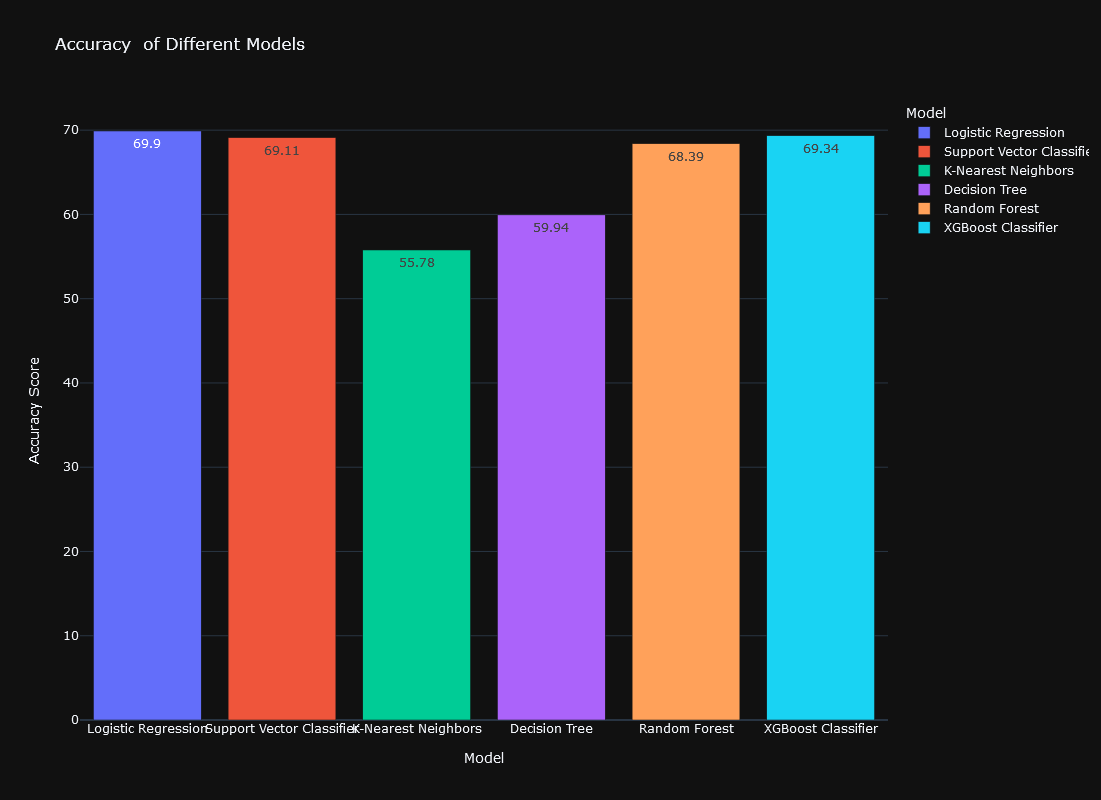

In [131]:
comparision_metrics_plt = px.bar(comparision_metrics,
                                 x='Model',
                                 y='Accuracy Score',  
                                 title='Accuracy  of Different Models',
                                 height=800,
                                 color='Model',
                                 text='Accuracy Score',  # Add text for both metrics
                                 )

comparision_metrics_plt.show()
